#### era5 analysis

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In [2]:
import glob

In [3]:
pr_files_era5 = sorted(glob.glob('/g/data/rt52/era5/single-levels/reanalysis/tp/202[0-1]/tp_era5_oper_sfc_*.nc'))
pr_files_era5

['/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200101-20200131.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200201-20200229.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200301-20200331.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200401-20200430.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200501-20200531.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200601-20200630.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200701-20200731.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200801-20200831.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200901-20200930.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20201001-20201031.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_

In [4]:
lcc_files_era5 = sorted(glob.glob('/g/data/rt52/era5/single-levels/reanalysis/lcc/202[0-1]/lcc_era5_oper_sfc_*.nc'))
tcc_files_era5 = sorted(glob.glob('/g/data/rt52/era5/single-levels/reanalysis/tcc/202[0-1]/tcc_era5_oper_sfc_*.nc'))

In [5]:
olr_files_era5 = sorted(glob.glob('/g/data/rt52/era5/single-levels/reanalysis/ttr/202[0-1]/ttr_era5_oper_sfc_*.nc'))
osr_files_era5 = sorted(glob.glob('/g/data/rt52/era5/single-levels/reanalysis/tsr/202[0-1]/tsr_era5_oper_sfc_*.nc'))

In [6]:
from dask.diagnostics import ProgressBar

In [7]:
pr_era = xr.open_mfdataset(pr_files_era5, combine = 'nested', concat_dim = 'time').sel(time = slice('2020-01-01', '2021-03-01'))
with ProgressBar():
    pr_era_daily = pr_era['tp'].coarsen(time = 24, boundary='trim').sum('time').load() # Calculate monthly mean.

[########################################] | 100% Completed | 311.22 s


In [10]:
lcc_era = xr.open_mfdataset(lcc_files_era5, combine = 'nested', concat_dim = 'time').sel(time = slice('2020-01-01', '2021-03-01'))
with ProgressBar():
    lcc_era_daily = lcc_era['lcc'].coarsen(time = 24, boundary='trim').sum('time').load() # Calculate monthly mean.

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fc063c52f60>>
Traceback (most recent call last):
  File "/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


[########################################] | 100% Completed | 470.34 s


In [16]:
tcc_era = xr.open_mfdataset(tcc_files_era5, combine = 'nested', concat_dim = 'time').sel(time = slice('2020-01-01', '2021-03-01'))
with ProgressBar():
    tcc_era_daily = tcc_era['tcc'].coarsen(time = 24, boundary='trim').sum('time').load() # Calculate monthly mean.

[########################################] | 100% Completed | 439.98 s


In [10]:
olr_era = xr.open_mfdataset(olr_files_era5, combine = 'nested', concat_dim = 'time').sel(time = slice('2020-01-01', '2021-03-01'))
with ProgressBar():
    olr_era_daily = olr_era['ttr'].coarsen(time = 24, boundary='trim').sum('time').load() # Calculate monthly mean.

[########################################] | 100% Completed | 320.01 s


In [11]:
osr_era = xr.open_mfdataset(osr_files_era5, combine = 'nested', concat_dim = 'time').sel(time = slice('2020-01-01', '2021-03-01'))
with ProgressBar():
    osr_era_daily = osr_era['tsr'].coarsen(time = 24, boundary='trim').sum('time').load() # Calculate monthly mean.

[########################################] | 100% Completed | 232.67 s


In [9]:
lcc_monthly = lcc_era_daily.resample(time = '1M').mean('time')
pr_monthly = pr_era_daily.resample(time = '1M').mean('time')
tcc_monthly = tcc_era_daily.resample(time = '1M').mean('time')

NameError: name 'lcc_era_daily' is not defined

In [18]:
import numpy as np

In [11]:
era_strat_regime = xr.where((lcc_monthly.mean('time')/24 > 0.50), 1, 0)

era_mod_conv_regime = xr.where((lcc_monthly.mean('time')/24 < 0.25) & (pr_monthly.mean('time')*1000 > 1.5) & (pr_monthly.mean('time')*1000 < 6), 0.1, 0)

era_strong_conv_regime = xr.where(pr_monthly.mean('time')*1000 > 8, -1, 0)

era_regimes = era_strat_regime + era_mod_conv_regime + era_strong_conv_regime
era_regimes = xr.where(era_regimes == 0, np.nan, era_regimes)

NameError: name 'lcc_monthly' is not defined

In [46]:
era_strat_regime = xr.where((tcc_monthly.mean('time')/24 > 0.70), 1, 0)

era_mod_conv_regime = xr.where((tcc_monthly.mean('time')/24 < 0.7) & (pr_monthly.mean('time')*1000 > 1.5) & (pr_monthly.mean('time')*1000 < 6), 0.1, 0)

era_strong_conv_regime = xr.where(pr_monthly.mean('time')*1000 > 8, -1, 0)

era_regimes_alt = era_strat_regime + era_mod_conv_regime + era_strong_conv_regime
era_regimes_alt = xr.where(era_regimes_alt == 0, np.nan, era_regimes_alt)

In [41]:
import cmocean

In [42]:
import matplotlib.pyplot as plt

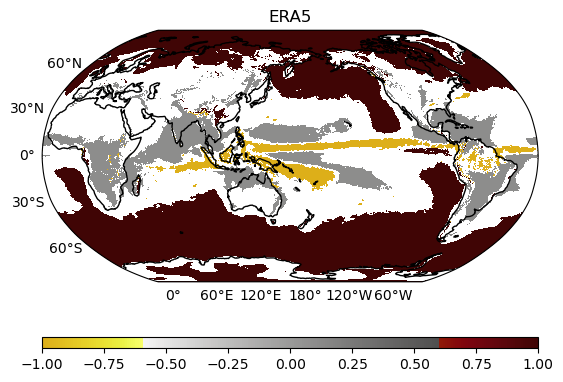

In [44]:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=160))
(era_regimes).plot(vmin=-1, vmax=1, transform=ccrs.PlateCarree(central_longitude=0), cmap=cmocean.cm.oxy_r, cbar_kwargs=dict(orientation='horizontal', aspect=45, shrink=1.0))
gl = ax.gridlines(alpha=0., draw_labels=True)
ax.coastlines()
ax.set_title('ERA5')
gl.top_labels=False
gl.right_labels=False

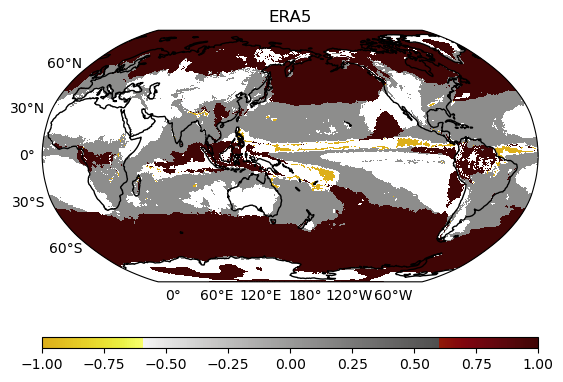

In [47]:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=160))
(era_regimes_alt).plot(vmin=-1, vmax=1, transform=ccrs.PlateCarree(central_longitude=0), cmap=cmocean.cm.oxy_r, cbar_kwargs=dict(orientation='horizontal', aspect=45, shrink=1.0))
gl = ax.gridlines(alpha=0., draw_labels=True)
ax.coastlines()
ax.set_title('ERA5')
gl.top_labels=False
gl.right_labels=False

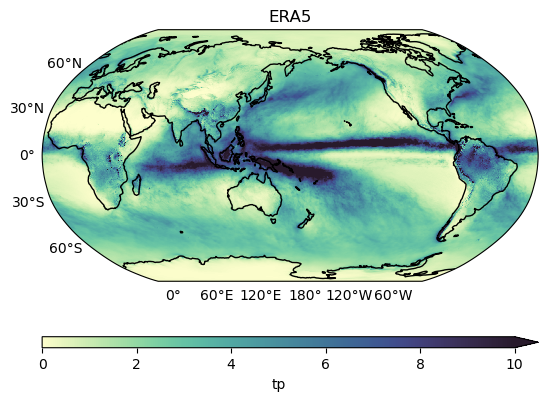

In [ ]:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=160))
(pr_era_daily.mean('time')*1000).plot(vmax=10, transform=ccrs.PlateCarree(central_longitude=0), cmap=cmocean.cm.deep, cbar_kwargs=dict(orientation='horizontal', aspect=45, shrink=1.0))
gl = ax.gridlines(alpha=0., draw_labels=True)
ax.coastlines()
ax.set_title('ERA5')
gl.top_labels=False
gl.right_labels=False

In [15]:
era_regimes = xr.open_dataset('/scratch/nf33/hk25-ConvZones/era_regimes.nc')['__xarray_dataarray_variable__']
era_regimes

<xarray.DataArray '__xarray_dataarray_variable__' (latitude: 721,
                                                   longitude: 1440)> Size: 8MB
[1038240 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0

In [17]:
import numpy as np

In [18]:
weights = np.cos(np.deg2rad(era_regimes.latitude))

In [19]:
import seaborn as sns

In [21]:
era_strat_rainfall = pr_era_daily.where(era_regimes == 1).sel(time = slice('2020-10-01', '2020-11-01'))
era_modconv_rainfall = pr_era_daily.where(era_regimes == 0.1).sel(time = slice('2020-10-01', '2020-11-01'))
era_strong_conv_rainfall = pr_era_daily.where(era_regimes == -1).sel(time = slice('2020-10-01', '2020-11-01'))

era_regimes_rainfall = xr.merge([era_strat_rainfall.to_dataset(name='strat'), era_modconv_rainfall.to_dataset(name='mod'), era_strong_conv_rainfall.to_dataset(name='strong')])
era_regimes_rainfall

<xarray.Dataset> Size: 797MB
Dimensions:    (longitude: 1440, latitude: 721, time: 32)
Coordinates:
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 256B 2020-10-01T11:30:00 ... 2020-11-01T...
Data variables:
    strat      (time, latitude, longitude) float64 266MB 0.0003382 ... 0.0006746
    mod        (time, latitude, longitude) float64 266MB nan nan nan ... nan nan
    strong     (time, latitude, longitude) float64 266MB nan nan nan ... nan nan

In [23]:
era_regimes_rainfall.to_netcdf('/scratch/nf33/hk25-ConvZones/era_regimes_rainfall_ann.nc')
# era_regimes.to_netcdf('/scratch/nf33/hk25-ConvZones/era_regimes.nc')
# era_regimes_alt.to_netcdf('/scratch/nf33/hk25-ConvZones/era_regimes_alt.nc')

/scratch/nf33/as8561/tmp/ipykernel_2237604/991533908.py:1: UserWarning: Times can't be serialized faithfully to int64 with requested units 'hours since 1900-01-01'. Serializing with units 'minutes since 1900-01-01' instead. Set encoding['dtype'] to floating point dtype to serialize with units 'hours since 1900-01-01'. Set encoding['units'] to 'minutes since 1900-01-01' to silence this warning .
  era_regimes_rainfall.to_netcdf('/scratch/nf33/hk25-ConvZones/era_regimes_rainfall_ann.nc')


In [ ]:
era_regimes = xr.open_dataset('/scratch/nf33/hk25-ConvZones/era_regimes.nc')

In [ ]:
import numpy as np

### loading IMERG data

In [12]:
list(intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml"))

NameError: name 'intake' is not defined

In [ ]:
current_location = "online"
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")[current_location]

In [ ]:
list(cat)

In [ ]:
model_accessors = dict(zip(["icon", "um", "era", "imerg"], ["icon_d3hp003", "um_glm_n2560_RAL3p3", "ERA5", "IR_IMERG"]))
model_accessors

In [ ]:
import pandas as pd

# icon_params = pd.DataFrame(cat[model_accessors["icon"]].describe()["user_parameters"])
# um_params = pd.DataFrame(cat[model_accessors["um"]].describe()["user_parameters"])
# era5_params = pd.DataFrame(cat[model_accessors["era"]].describe()["user_parameters"])
imerg_params = pd.DataFrame(cat[model_accessors["imerg"]].describe()["user_parameters"])

In [8]:
imerg_params

,name,description,type,allowed,default
0,zoom,zoom resolution of the dataset,int,[9],9


In [ ]:
icon_z5_t1h = cat[model_accessors["icon"]](zoom=5, time_method="inst", time='PT1H').to_dask().sel(time = slice('2020--01-01', '2021-04-01'))
icon_z5_t3h = cat[model_accessors["icon"]](zoom=5, time_method="mean", time='PT3H').to_dask().sel(time = slice('2020--01-01', '2021-04-01'))
icon_z5_t1D = cat[model_accessors["icon"]](zoom=5, time_method="mean", time='P1D').to_dask().sel(time = slice('2020--01-01', '2021-04-01'))
icon_z10_t1D = cat[model_accessors["icon"]](zoom=10, time_method="mean", time='P1D').to_dask().sel(time = slice('2020--01-01', '2021-04-01')) 

um_z5_t1h = cat[model_accessors["um"]](zoom=5, time='PT1H').to_dask().sel(time = slice('2020--01-01', '2021-04-01')) 
um_z5_t3h = cat[model_accessors["um"]](zoom=5, time='PT3H').to_dask().sel(time = slice('2020--01-01', '2021-04-01'))

era_z5 = cat[model_accessors["era"]](zoom=5).to_dask().sel(time = slice('2020--01-01', '2021-04-01')) 
imerg = cat[model_accessors["imerg"]](zoom=9).to_dask().sel(time = slice('2020--01-01', '2021-04-01'))
# ds_z10 = cat["icon_d3hp003"](zoom=10, time_method="mean", time='P1D').to_dask() 
# ds_z10

In [ ]:
imerg.time

In [ ]:
from dask.diagnostics import ProgressBar

In [ ]:
with ProgressBar():
    loaded_dat = (((era_z5.tp)*1000).mean('time')).load()

#### regridding to era5 for daily data from high-res models

In [24]:
def get_nn_lon_lat_index(nside, lons, lats):
    """
    nside: integer, power of 2. The return of hp.get_nside()
    lons: uniques values of longitudes
    lats: uniques values of latitudes
    returns: array with the HEALPix cells that are closest to the lon/lat grid
    """
    lons2, lats2 = np.meshgrid(lons, lats)
    return xr.DataArray(
        hp.ang2pix(nside, lons2, lats2, nest = True, lonlat = True),
        coords=[("lat", lats), ("lon", lons)],
    )

In [ ]:
# Find the HEALPix pixels that are closest to the ERA5 grid

# longitudes and latitudes for the ERA5 grid
lon = pr_era_daily['longitude'].values
lat = pr_era_daily['latitude'].values

# nside for um simulation, it should be equal to 2**zoom
this_nside = hp.get_nside(icon)

cells = get_nn_lon_lat_index(this_nside, lon, lat) 

cells